In [100]:
import pandas as pd
import random

data = {
    'Tipe Ujian' : ['UTS1', 'UAS1', 'UTS2', 'UAS2']*3,
    'Mata Pelajaran' : ['Fisika']*4 + ['Matematika']*4+['Statistika']*4,
    'Rata2 Waktu Belajar (menit)' : [random.choice(range(200, 800)) for i in range(12)],
    'Rata2 Nilai Ujian' : [random.choice(range(40, 100)) for i in range(12)] 
}

df = pd.DataFrame(data)
df

,Tipe Ujian,Mata Pelajaran,Rata2 Waktu Belajar (menit),Rata2 Nilai Ujian
0,UTS1,Fisika,781,40
1,UAS1,Fisika,414,94
2,UTS2,Fisika,574,54
3,UAS2,Fisika,332,66
4,UTS1,Matematika,437,77
5,UAS1,Matematika,783,72
6,UTS2,Matematika,344,98
7,UAS2,Matematika,550,97
8,UTS1,Statistika,472,50
9,UAS1,Statistika,645,83




---



---



## Soal 1. Data Cleaning

Lakukan sorting data berdasarkan Rata2 nilai ujian dari terbesar ke terkecil

*   Lakukan sorting data berdasarkan Rata2 nilai ujian dari terbesar ke terkecil
*   Tipe Ujian dan Mata pelajaran apakah yang memiliki rata2 nilai terkecil?






In [10]:
#code here
sortedAvgUjian = df.sort_values('Rata2 Nilai Ujian', ascending=False)
sortedAvgUjian

,Tipe Ujian,Mata Pelajaran,Rata2 Waktu Belajar (menit),Rata2 Nilai Ujian
9,UAS1,Statistika,603,92
6,UTS2,Matematika,228,88
5,UAS1,Matematika,451,82
8,UTS1,Statistika,436,82
4,UTS1,Matematika,585,74
0,UTS1,Fisika,492,69
7,UAS2,Matematika,227,63
3,UAS2,Fisika,245,56
1,UAS1,Fisika,223,45
2,UTS2,Fisika,374,44


In [38]:
df.sort_values('Rata2 Nilai Ujian', ascending=False).loc[df.index[-2:-1],['Tipe Ujian', 'Mata Pelajaran']]

,Tipe Ujian,Mata Pelajaran
10,UTS2,Statistika


Expected output:

(Output bisa berbeda-beda)

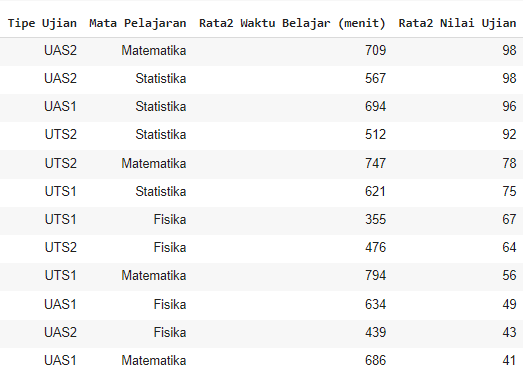



---



---



<h2>Soal 2: Data Restructuring</h2>

Jelaskan itu pivoting dan melting data

Pivoting adalah suatu pengubahan bentuk data dengan memutar data yang terletak di baris menjadi di column. <br>
Melting adalah 'unpivoting', melting mengubah suatu data dengan memutar dari yang tadinya berada di posisi column menjadi di posisi row.



---



---



<h2>Soal 3: Reshaping Data 1</h2>

In [101]:
import pandas as pd
import random

data = {
    'Tipe Ujian' : ['UTS1', 'UAS1', 'UTS2', 'UAS2']*3,
    'Mata Pelajaran' : ['Fisika']*4 + ['Matematika']*4+['Statistika']*4,
    'Rata2 Waktu Belajar (menit)' : [random.choice(range(200, 800)) for i in range(12)],
    'Rata2 Nilai Ujian' : [random.choice(range(40, 100)) for i in range(12)] 
}

df = pd.DataFrame(data)
df

,Tipe Ujian,Mata Pelajaran,Rata2 Waktu Belajar (menit),Rata2 Nilai Ujian
0,UTS1,Fisika,569,46
1,UAS1,Fisika,625,85
2,UTS2,Fisika,349,89
3,UAS2,Fisika,613,58
4,UTS1,Matematika,321,68
5,UAS1,Matematika,397,94
6,UTS2,Matematika,336,59
7,UAS2,Matematika,583,97
8,UTS1,Statistika,535,61
9,UAS1,Statistika,721,58


Perhatikan data di atas, kemudian ubahlah bentuknya agar sesuai yang di harapkan.

In [39]:
#code here
df.pivot(index='Tipe Ujian',
         columns='Mata Pelajaran',
         values=['Rata2 Nilai Ujian', 'Rata2 Waktu Belajar (menit)'])

Rata2 Nilai Ujian                        \
Mata Pelajaran            Fisika Matematika Statistika   
Tipe Ujian                                               
UAS1                          45         82         92   
UAS2                          56         63         42   
UTS1                          69         74         82   
UTS2                          44         88         40   

               Rata2 Waktu Belajar (menit)                        
Mata Pelajaran                      Fisika Matematika Statistika  
Tipe Ujian                                                        
UAS1                                   223        451        603  
UAS2                                   245        227        463  
UTS1                                   492        585        436  
UTS2                                   374        228        445

Expected Result:

(Output bisa berbeda-beda)

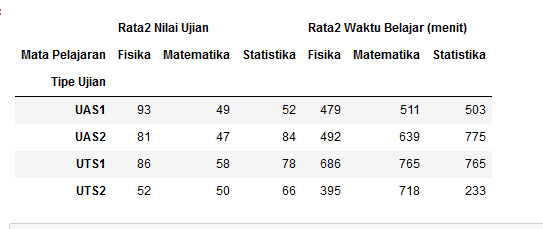



---



---



<h2>Soal 4: Reshaping Data 2</h2>

In [98]:
import pandas as pd

data = {
    'Hari' : ['Sabtu', 'Minggu'],
    'Kebun Binatang' : [271, 399],
    'Dufan' : [501, 700],
    'Disney' : [1000, 1001],
    'Bali' : [900, 803]
}
df2 = pd.DataFrame(data).set_index('Hari')
df2

,Kebun Binatang,Dufan,Disney,Bali
Hari,,,,
Sabtu,271,501,1000,900
Minggu,399,700,1001,803


diatas adalah data tentang jumlah pengunjung di berbagai tempat hiburan, ubahlah struktur data tersebut sehingga sesuai dengan hasil yang diharapkan.

In [99]:
#code here
df2 = df2.reset_index() # transform index 'Hari' menjadi kolom agar dapat dipanggil pada id_vars
df2.melt(id_vars='Hari', var_name='Tempat Hiburan', value_name='Pengunjung')

,Hari,Tempat Hiburan,Pengunjung
0,Sabtu,Kebun Binatang,271
1,Minggu,Kebun Binatang,399
2,Sabtu,Dufan,501
3,Minggu,Dufan,700
4,Sabtu,Disney,1000
5,Minggu,Disney,1001
6,Sabtu,Bali,900
7,Minggu,Bali,803


Expected Result:

(Output bisa berbeda-beda)

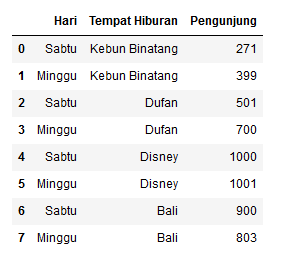



---



---



<h2>Soal 5: Data Enrichment</h2>

Lakukan binning data menggunakan qcut sehingga sesuai hasil yang diharapkan

In [119]:
import pandas as pd
import random

data = {
    'Tipe Ujian' : ['UTS1', 'UAS1', 'UTS2', 'UAS2']*3,
    'Mata Pelajaran' : ['Fisika']*4 + ['Matematika']*4+['Statistika']*4,
    'Rata2 Waktu Belajar (menit)' : [random.choice(range(200, 800)) for i in range(12)],
    'Rata2 Nilai Ujian' : [random.choice(range(40, 100)) for i in range(12)] 
}

df = pd.DataFrame(data)
df

,Tipe Ujian,Mata Pelajaran,Rata2 Waktu Belajar (menit),Rata2 Nilai Ujian
0,UTS1,Fisika,468,86
1,UAS1,Fisika,445,64
2,UTS2,Fisika,332,63
3,UAS2,Fisika,442,91
4,UTS1,Matematika,444,94
5,UAS1,Matematika,687,62
6,UTS2,Matematika,252,48
7,UAS2,Matematika,598,83
8,UTS1,Statistika,617,72
9,UAS1,Statistika,342,68


In [120]:
#code here
avgNilaiUjian = list(df['Rata2 Nilai Ujian'])
avgNilaiUjian

status_kelulusan = ['kesalahan nilai' if (i > 100 or i < 0) else 'lulus' if i >= 85 else 'remedial' if i >= 75 else 'tidak lulus' for i in avgNilaiUjian ]
df['Keterangan Kelulusan'] = status_kelulusan
df

,Tipe Ujian,Mata Pelajaran,Rata2 Waktu Belajar (menit),Rata2 Nilai Ujian,Keterangan Kelulusan
0,UTS1,Fisika,468,86,lulus
1,UAS1,Fisika,445,64,tidak lulus
2,UTS2,Fisika,332,63,tidak lulus
3,UAS2,Fisika,442,91,lulus
4,UTS1,Matematika,444,94,lulus
5,UAS1,Matematika,687,62,tidak lulus
6,UTS2,Matematika,252,48,tidak lulus
7,UAS2,Matematika,598,83,remedial
8,UTS1,Statistika,617,72,tidak lulus
9,UAS1,Statistika,342,68,tidak lulus


Expected Output:

(Output bisa berbeda-beda)

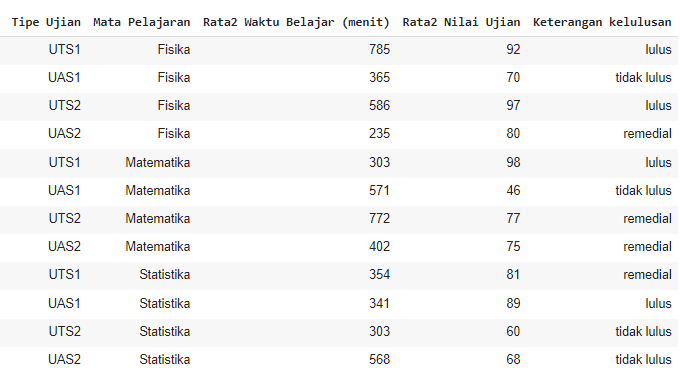



---



---

